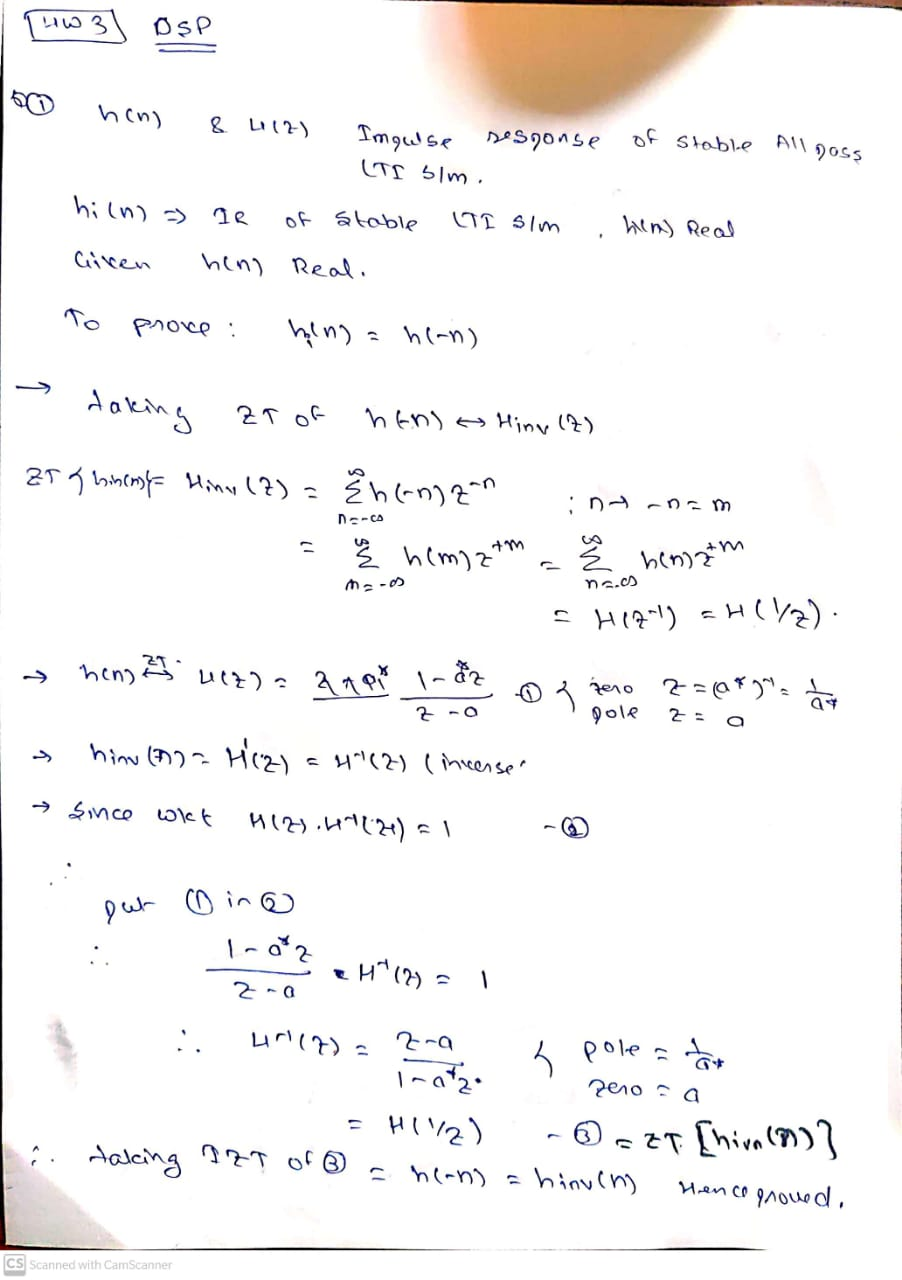

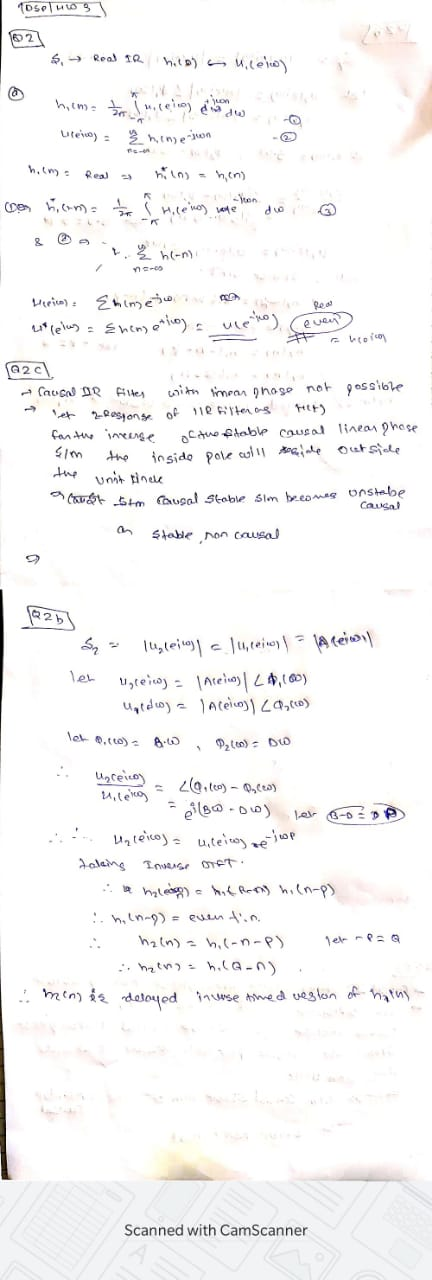

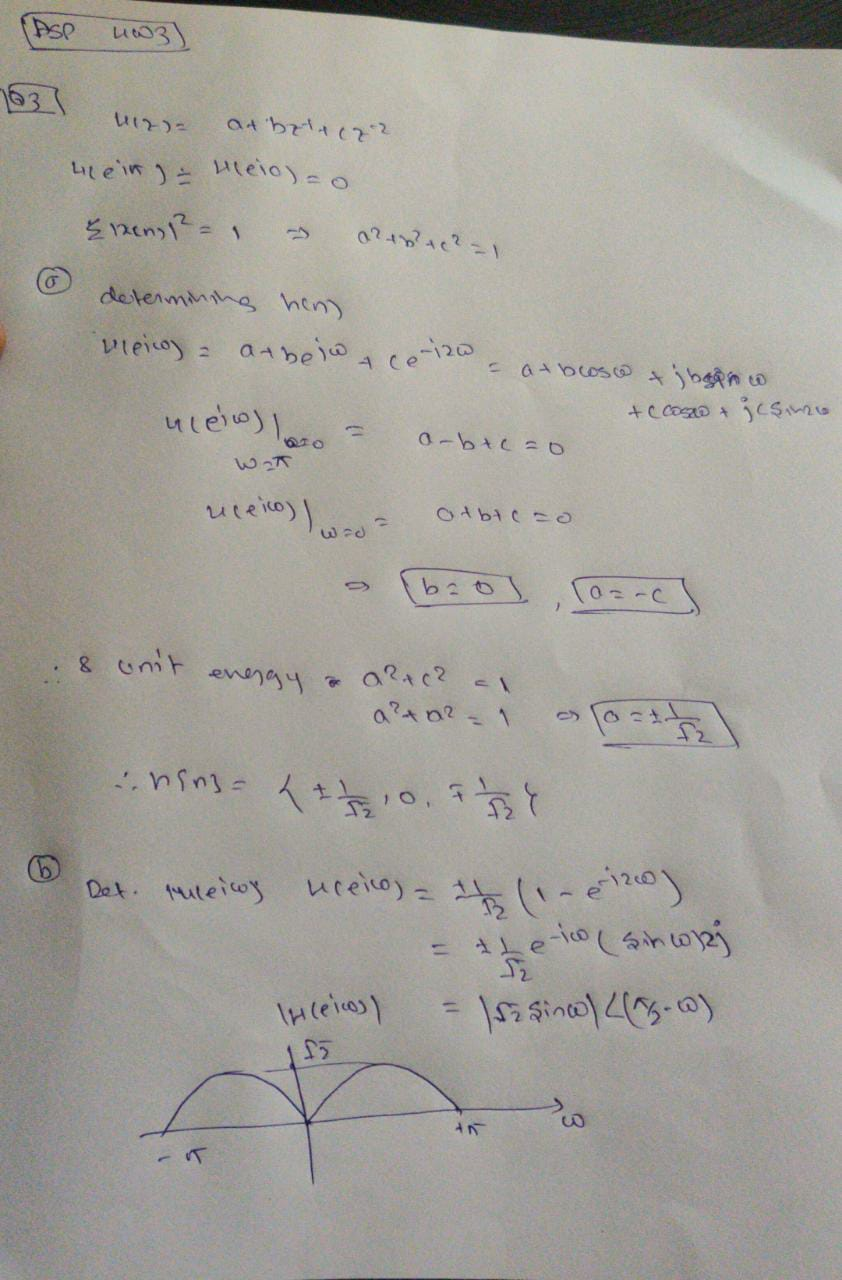

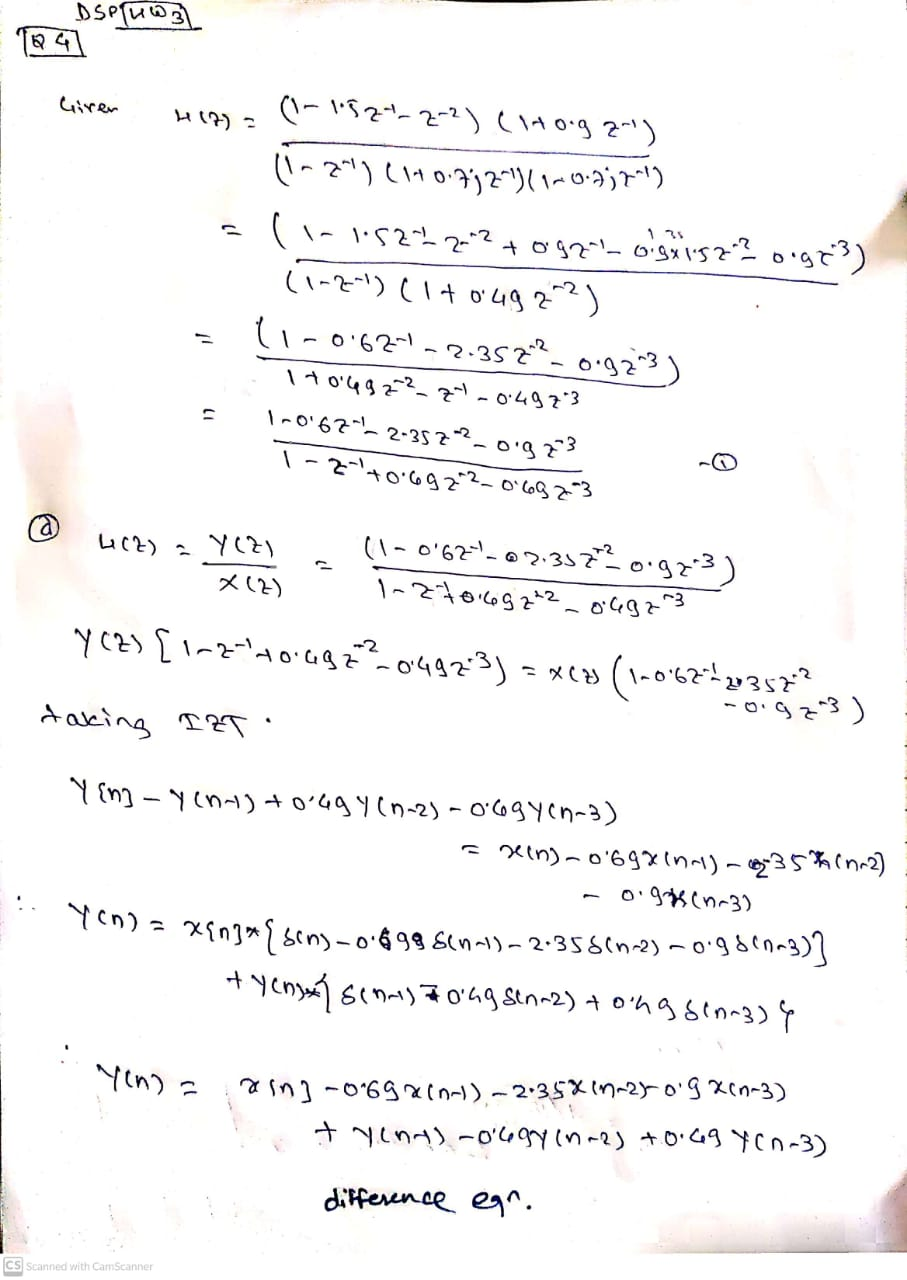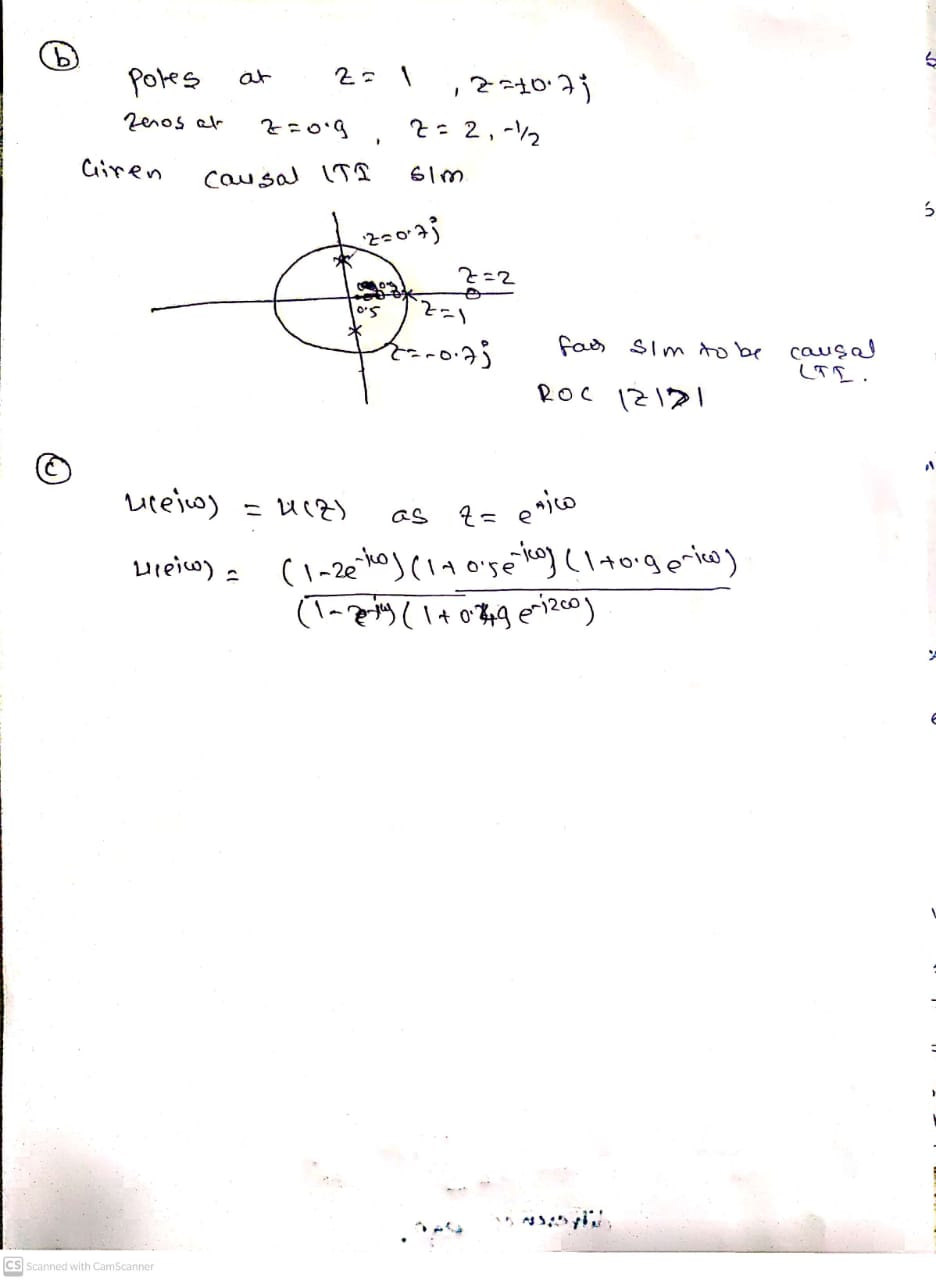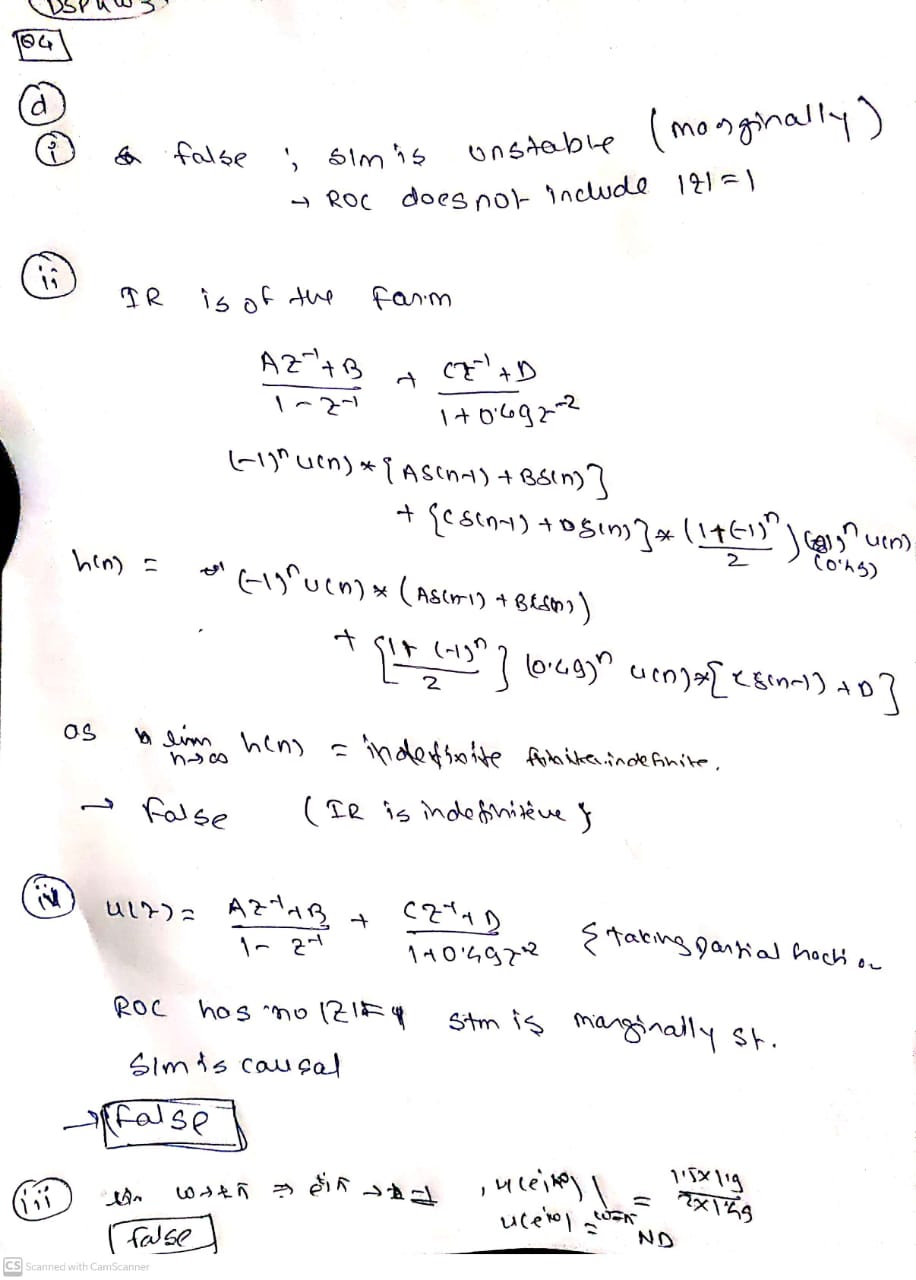

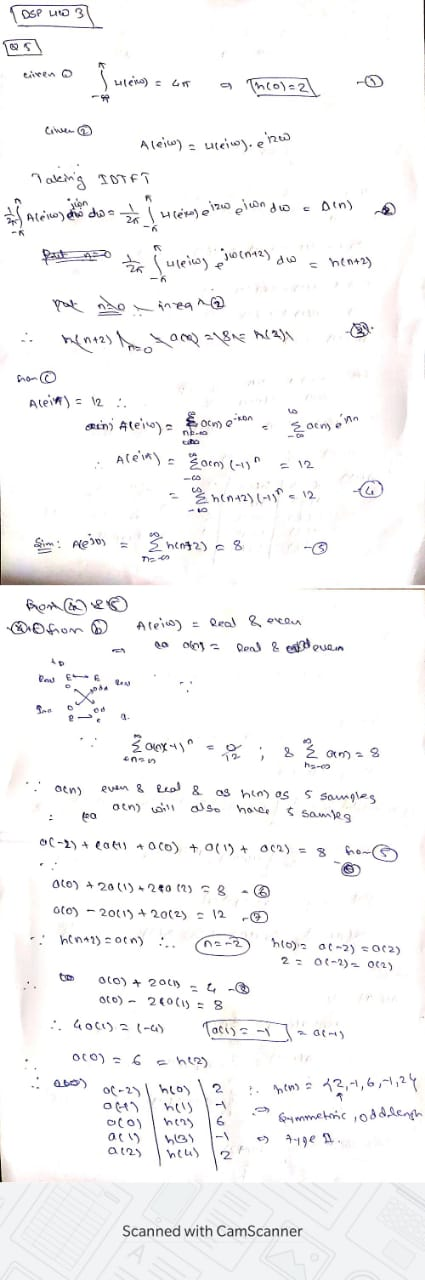

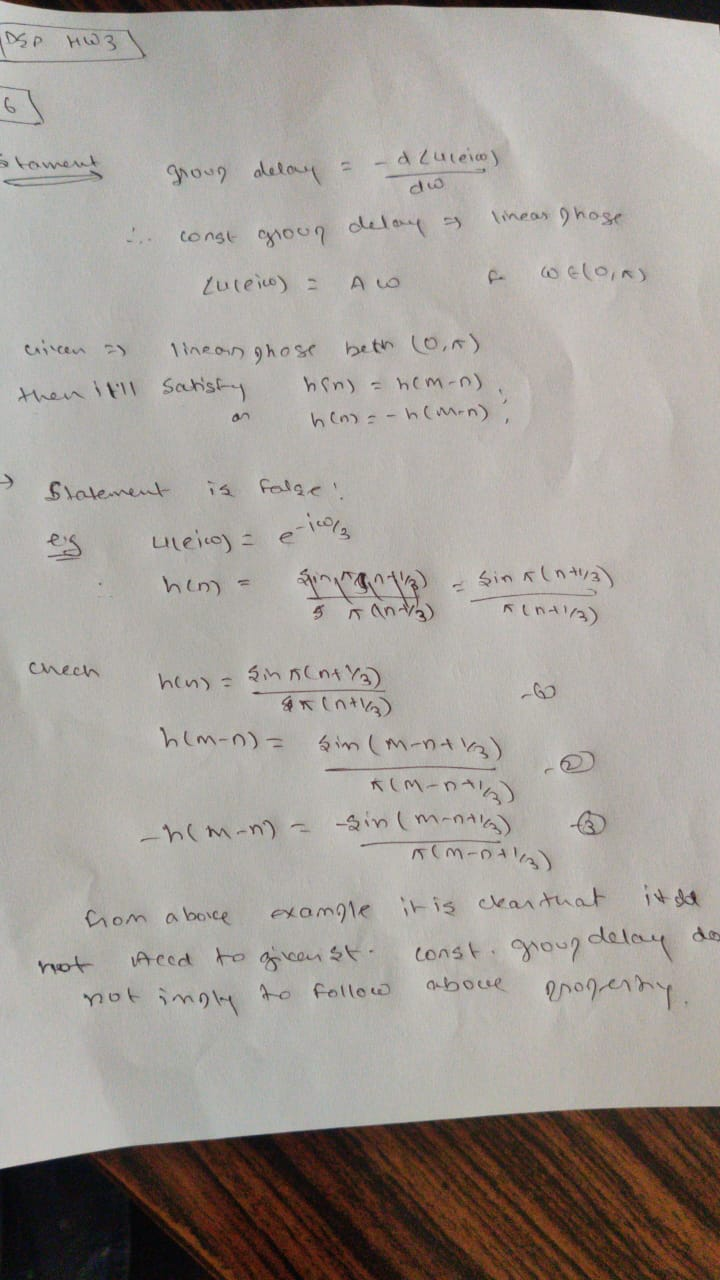

filtered gaussian pulse is somewhat scaled version of original guassian pulse


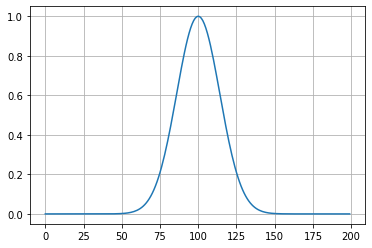

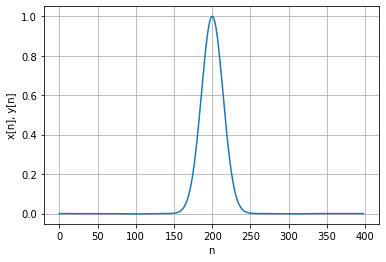

In [ ]:
#Question 8a
import matplotlib.pyplot as plt
import numpy as np

wc=np.pi/2
n=np.arange(-100,100)
h = wc / np.pi * np.sinc(wc * n /np.pi)
g = np.exp(-n**2 / 400)
y = np.convolve(h,g)
plt.figure(1)
plt.plot(g)
plt.grid('True')
plt.figure(2)
plt.plot(y)
plt.xlabel('n')
plt.ylabel('x[n], y[n]')
plt.grid('True')
print("filtered gaussian pulse is somewhat scaled version of original guassian pulse")

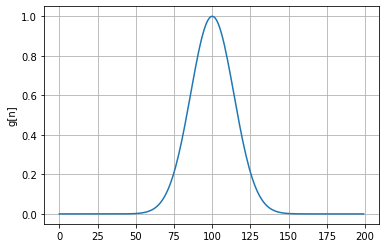

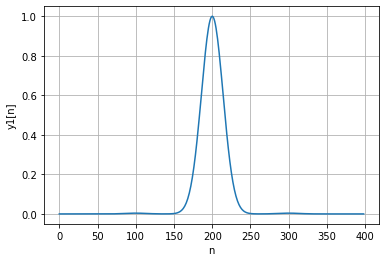

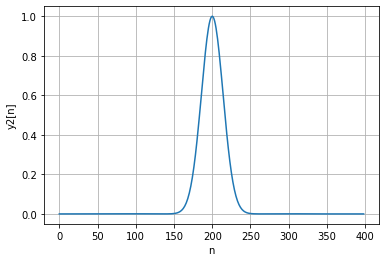

In [ ]:
#Question 8b
import matplotlib.pyplot as plt
import numpy as np

wc1=np.pi/4
n=np.arange(-100,100)
h = wc1 / np.pi * np.sinc(wc1 * n /np.pi)
g = np.exp(-n**2 / 400)
y1 = np.convolve(h,g)
plt.figure(1)
plt.plot(g)
plt.ylabel('g[n]')
plt.grid('True')
plt.figure(2)
plt.plot(y1)
plt.xlabel('n')
plt.ylabel('y1[n]')
plt.grid('True')
wc2=3*np.pi/4
h = wc2 / np.pi * np.sinc(wc2 * n /np.pi)
g = np.exp(-n**2 / 400)
y2 = np.convolve(h,g)
plt.figure(3)
plt.plot(y2)
plt.xlabel('n')
plt.ylabel('y2[n]')
plt.grid('True')


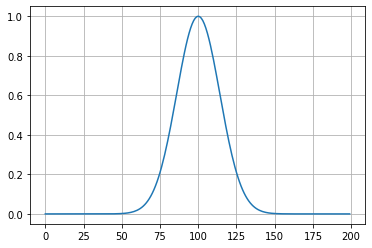

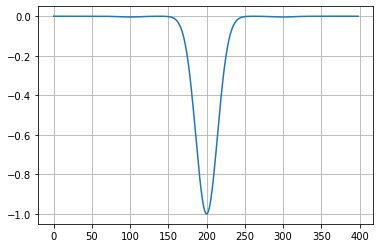

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

wc = np.pi / 4
n = np.arange(-100,100).astype(float)
h = (-1**(n))*wc / np.pi * np.sinc(wc * n /np.pi)
g = np.exp(-n**2 / 400)
y = np.convolve(h,g)
plt.figure(1)
plt.plot(g)
plt.grid('True')
plt.figure(2)
plt.plot(y)
plt.grid('True')


the sampling rate is
44100


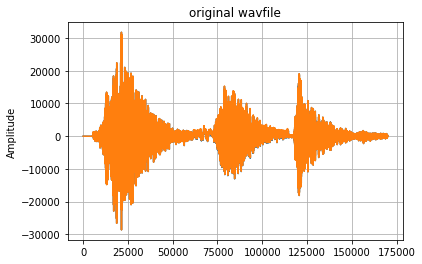

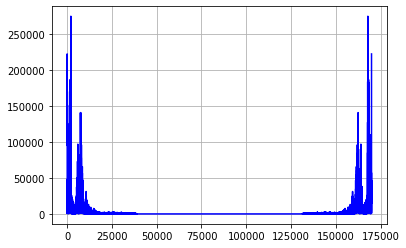

In [ ]:
#Question 7
import pylab
from scipy.io import wavfile
from matplotlib import pyplot as plt
from IPython.display import Audio 
from scipy.io.wavfile import write
import scipy.signal as sig
from scipy.fftpack import fft,fftfreq

wavepath="/content/rhino.wav"
filename="rhino.wav"
samplerate, wavf=wavfile.read(filename)
print("the sampling rate is")
print(samplerate)
plt.figure(1)
plt.title('original wavfile')
plt.ylabel("Amplitude")
plt.plot(wavf);plt.grid('True')
#7.2
plt.figure(2)
wavf[:22]
a=wavf.T[0]
b=[(ele/2**8.)*2-1 for ele in a]
c = fft(b)
plt.plot(abs(c),'b');plt.grid('True')
plt.show()

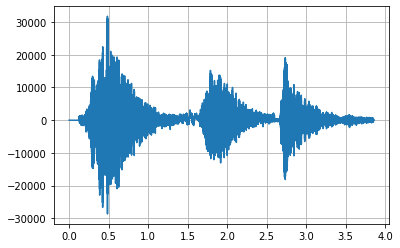

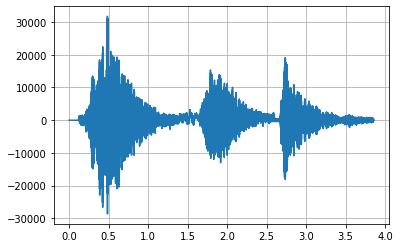

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


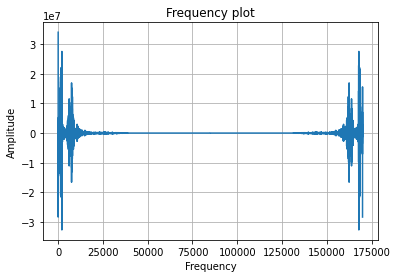

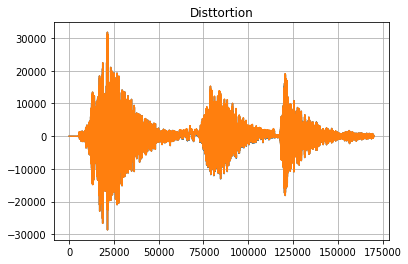

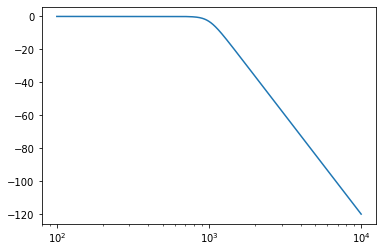

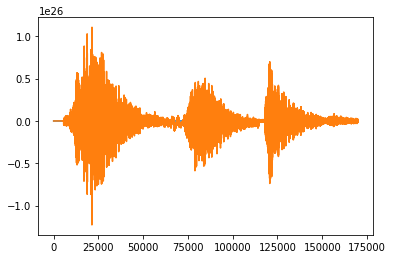

Samples rate  44100
(169984, 2)


In [ ]:
#7.1
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ids
from scipy import signal
samplerate,data = wavfile.read('rhino.wav')

length = data.shape[0] / samplerate

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel");plt.grid('True')
plt.show()
plt.plot(time, data[:, 1], label="Right channel");plt.grid('True')
plt.show()

four = np.fft.fft(data[:,0])
plt.plot(four);plt.grid('True')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Frequency plot")
plt.show();plt.grid('True')
gau = np.random.normal(0,0.1)
noise = data + gau
data1 = noise.astype(np.int16)
plt.plot(noise);plt.grid('True')
plt.title("Disttortion")
plt.show()
plt.grid('True')
wavfile.write('dist_audio.wav',samplerate, data1)
ids.Audio('dist_audio.wav')
b, a = signal.butter(6,1000,'low',analog = 'True')
w, h = signal.freqs(b,a,worN=4096)
plt.semilogx(w,20*np.log10(abs(h)))
plt.grid()
plt.show()
filt_sig = signal.lfilter(b,a,noise)
plt.plot(filt_sig);plt.grid('True')
plt.grid()
plt.show()
data2 = filt_sig.astype(np.int16)
wavfile.write('filtered_audio.wav',samplerate,data2)
ids.Audio('filtered_audio.wav')
print("Samples rate ", samplerate)
print(data.shape)